In [ ]:
#objetivo principal: clasificar en 4 clases: fondo, 1, 2, 3

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch
from PIL import Image

# Datos 

In [ ]:
#esta balanceado???

In [212]:
!ls ./gestos/train/0 | wc -l
!ls ./gestos/train/1 | wc -l
!ls ./gestos/train/2 | wc -l
!ls ./gestos/train/3 | wc -l

!ls ./gestos/test/0 | wc -l
!ls ./gestos/test/1 | wc -l
!ls ./gestos/test/2 | wc -l
!ls ./gestos/test/3 | wc -l

2500
zsh:1: command not found: !ls
0
2500
2500
2500
30
30
30
30


In [80]:
#sí, lo esta!, punto para nosotros...

### handling imgs and colormaps 

In [199]:
img = plt.imread('gestos/train/1/D1.jpg')
lum_img= img[:, :, 0]
lum_img2= img[:, :, 0]

<IPython.core.display.Javascript object>


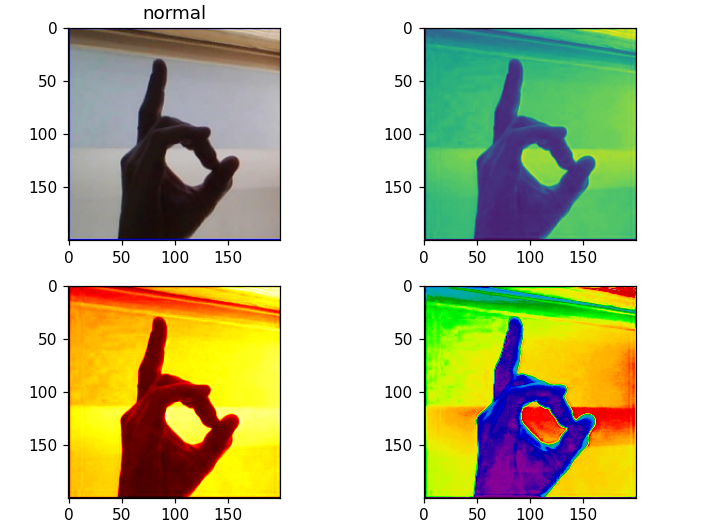

In [210]:
#f1_axes[0, 0].plot(1, 1)
#axs[1, 1].scatter(x, y)
fig1, f1_axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True)


f1_axes[0, 0].set_title("normal")
f1_axes[0, 1].imshow(lum_img)
f1_axes[1, 0].imshow(lum_img, cmap= "hot")
f1_axes[1, 1].imshow(lum_img, cmap= 'nipy_spectral')
f1_axes[0, 0].imshow(img)


### transforms

In [53]:
#template to reference


    # define how we augment the data for composing the batch-dataset in train and test step
transform = {
    'train': torchvision.transforms.Compose([
        #transforms.Resize([224,224]), # Resizing the image as the VGG only take 224 x 244 as input size
        #transforms.RandomHorizontalFlip(), # Flip the data horizontally
        #TODO if it is needed, add the random crop
        torchvision.transforms.ToTensor(),
        #transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5))
    ]),
    'test': torchvision.transforms.Compose([
        #transforms.Resize([224,224]),
        #transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor(),
        #transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5))
    ])
}

In [194]:
transform = torchvision.transforms.Compose([
    # you can add other transformations in this list
    torchvision.transforms.Resize(224),
    #torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor()
])

### train data set and data loader

In [195]:
#(OneTwoThree dataset)
OTT_train_dataset = torchvision.datasets.ImageFolder('gestos/train/', transform = transform)
train_data_loader = torch.utils.data.DataLoader(OTT_train_dataset,
                                          batch_size=16, ##TODO: ajustar este tamaño
                                          shuffle=True,
                                          num_workers=4)
OTT_train_dataset

Dataset ImageFolder
    Number of datapoints: 10000
    Root location: gestos/train/
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=PIL.Image.BILINEAR)
               ToTensor()
           )

### test data set and data loader

In [196]:
#(OneTwoThree dataset)
OTT_test_dataset = torchvision.datasets.ImageFolder('gestos/test/', transform = transform)
test_data_loader = torch.utils.data.DataLoader(OTT_test_dataset,
                                          batch_size=16, ##TODO: ajustar este tamaño
                                          shuffle=True,
                                          num_workers=4)
OTT_test_dataset

Dataset ImageFolder
    Number of datapoints: 120
    Root location: gestos/test/
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=PIL.Image.BILINEAR)
               ToTensor()
           )

<IPython.core.display.Javascript object>


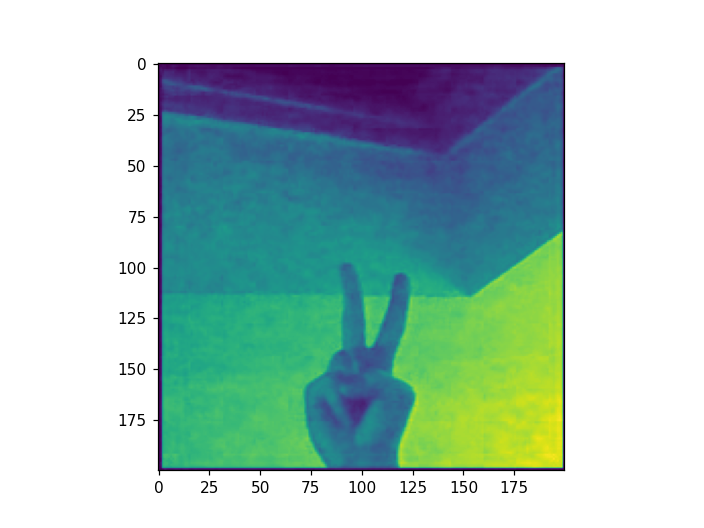

In [197]:
#bloque de comprension de donde queda la imagen 
iterable= iter(train_data_loader)
elemento_del_iterable = next(iterable) #contiene en el [0] los 16 ejemplos de las fotos y en el [1] las clases de estos
fig, ax = plt.subplots()
plt.imshow(foto[0][0][0])

# creacion del modelo

In [208]:
class OTT_Classifier(torch.nn.Module):
    
    def __init__(self):
        super(OTT_Classifier, self).__init__()
        self.conv1 = torch.nn.Conv2d(kernel_size=4, in_channels=3, out_channels=10)
        self.mpool = torch.nn.MaxPool2d(kernel_size=2)
        self.activation = torch.nn.ReLU()
        self.linear1 = torch.nn.Linear(in_features=10*110*110 ,out_features=4)
        pass
                     
    def forward(self, x):
        h = self.mpool((self.activation(self.conv1(x))))
        print(h.shape)
        #view o reshape
        h = h.view(-1, self.linear1.in_features)
        h = self.activation(self.linear1(h))
        return h
        
                     
                    
                     
                     
                     
                     

In [213]:
#hacer pasar un ejemplo 
#image = torch.tensor(np.zeros((1,3,200,200)), dtype= torch.float32) #fake example
model = OTT_Classifier()
display(model)
model.forward(OTT_train_dataset[0][0].unsqueeze(0))#.size()

OTT_Classifier(
  (conv1): Conv2d(3, 10, kernel_size=(4, 4), stride=(1, 1))
  (mpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (activation): ReLU()
  (linear1): Linear(in_features=121000, out_features=4, bias=True)
)

torch.Size([1, 10, 110, 110])


tensor([[0.1039, 0.0000, 0.0000, 0.0516]], grad_fn=<ReluBackward0>)

In [ ]:
##CNN  SM  MLP_3:  

In [ ]:
##CNN

In [ ]:
#POOLING

In [ ]:
#MLP tradicional

In [ ]:
#FUNCION DE COSTO 

# Función de costo entropía cruzada binaria  #ojo con lo que recibe cada una, si activado o no
criterion = torch.nn.BCEWithLogitsLoss(reduction='sum') #recibe la salida lineal y es un poquito mas estable
torch.nn.BCELoss # recibe una probabilidad entre cero y uno

In [ ]:
#adam #inventar_mis_convoluciones?????? no po loco, los encuentra sola... 

In [1]:
#OPTIMIZADOR #evaluar la posibilidad de utilizar diferentes optimizadores en diferentes epocas como sugiere el profe.
# diferntes optimizadores siguiendo diferentes parametros (video clase) 
# diferentes optimizadores que se llaman cada cierto numero de epocas.
# variar los parametros a manito de mi optimizador cada cierta cantidad de epocas 

# Algoritmo de optimización Gradiente Descendente Estocástico
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

torch.optim.Adam?

# "una vez ya usaste/calibraste con adam.. la literatura sugiere volver a SGD"

NameError: name 'torch' is not defined

In [ ]:
#Entrenamiento

In [ ]:
#modelo de entrenamiento base 

for epoch in range(num_epochs): # Durante un cierto número de épocas
        for minibatch in data: # Para cada minibatch de datos
            optimizer.zero_grad() # Limpiamos los gradientes
            x, y = minibatch # Desempaquetamos
            yhat = model.forward(x) # Predecimos
            loss = criterion(yhat, y) # Evaluamos
            loss.backward() # Calculamos los gradientes
            optimizer.step() # Actualizamos los parámetros

In [ ]:
#Metricas de modelo  #test #matriz de confusion #

In [ ]:
#cross validation

In [ ]:
#cybenkos?

In [ ]:
#bibliografia

#apis
https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder
    
    
#tutoriales

https://medium.com/jun-devpblog/pytorch-1-transform-imagefolder-dataloader-7f75f0a460c0
    https://www.kaggle.com/androbomb/using-cnn-to-classify-images-w-pytorch 